### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Work\\AIIM\\gretel-silver\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.data_analyzer import DataAnalyzer as data_analyzer

In [4]:
config_f_name = 'R2-TCR-500-28-0.25_GCN_RSGG.jsonc'

### Evaluating the explainer

In [7]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\R2-TCR-500-28-0.25_GCN_RSGG.jsonc
2024-04-18 10:38:50,-262420134 | INFO | 5904 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\R2-TCR-500-28-0.25_GCN_RSGG.jsonc Run: 2


2024-04-18 10:38:50,-262420109 | INFO | 5904 - Creating the evaluation manager....................................
2024-04-18 10:38:51,-262420086 | INFO | 5904 - Creating the paired  evaluators.....................................
2024-04-18 10:38:51,-262420012 | INFO | 5904 - Loading: TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91
2024-04-18 10:38:51,-262419944 | INFO | 5904 - Created: TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91
2024-04-18 10:38:51,-262419890 | INFO | 5904 - Loading: TreeCyclesOracle-e67513927e99743ff3718c388e68fb02
2024-04-18 10:38:51,-262419847 | INFO | 5904 - Created: TreeCyclesOracle-e67513927e99743ff3718c388e68fb02
2024-04-18 10:38:51,-262419846 | INFO | 5904 - Instantiating: src.explainer.generative.gans.graph.model.GAN
2024-04-18 10:38:51,-262419843 | INFO | 5904 - Instantiating: src.explainer.generative.gans.graph.res_gen.ResGenerator
2024-04-18 10:38:51,-262419825 | INFO | 5904 - Instantiating: torch.optim.SGD
2024-04-18 10:38:51,-262419823 | INFO | 5904

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\model.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = torch.mean(self.loss_fn(y_pred.squeeze().double(), y_batch.double()) * torch.tensor(oracle_scores, dtype=torch.float))


2024-04-18 10:38:51,-262419258 | INFO | 5904 - Epoch 2	 Loss_D =  0.4909	 Loss_G =  0.4047
2024-04-18 10:38:51,-262419165 | INFO | 5904 - Epoch 3	 Loss_D =  0.6704	 Loss_G =  0.2760
2024-04-18 10:38:52,-262419084 | INFO | 5904 - Epoch 4	 Loss_D =  0.6149	 Loss_G =  0.2907
2024-04-18 10:38:52,-262419008 | INFO | 5904 - Epoch 5	 Loss_D =  0.8102	 Loss_G =  0.3963
2024-04-18 10:38:52,-262418933 | INFO | 5904 - Epoch 6	 Loss_D =  0.6147	 Loss_G =  0.4823
2024-04-18 10:38:52,-262418864 | INFO | 5904 - Epoch 7	 Loss_D =  0.8843	 Loss_G =  0.4330
2024-04-18 10:38:52,-262418786 | INFO | 5904 - Epoch 8	 Loss_D =  0.6823	 Loss_G =  0.3540
2024-04-18 10:38:52,-262418695 | INFO | 5904 - Epoch 9	 Loss_D =  0.7929	 Loss_G =  0.4152
2024-04-18 10:38:52,-262418612 | INFO | 5904 - Epoch 10	 Loss_D =  0.6692	 Loss_G =  0.7985
2024-04-18 10:38:52,-262418538 | INFO | 5904 - Epoch 11	 Loss_D =  0.7710	 Loss_G =  1.2534
2024-04-18 10:38:52,-262418464 | INFO | 5904 - Epoch 12	 Loss_D =  0.6782	 Loss_G =  0.8

### Aggregating the stats

In [9]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-04-18 10:43:15,-262155244 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-18 10:43:15,-262155242 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-04-18 10:43:15,-262155241 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-04-18 10:43:15,-262155240 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-04-18 10:43:15,-262155238 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-04-18 10:43:15,-262155237 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-04-18 10:43:15,-262155236 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-04-18 10:43:15,-262155232 | INFO | 5904 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-18 10:43:15,-2

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,0.001174,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,0.010442,1.000000,0.000000,1.000000,0.0
3,examples_configs,TreeInfinityCycles-b2c6afc380be14e45aa51e3277b...,OracleTorch-cc748bacdbe65b8cfdf99cb980aab5c5,OvershootCounterfactualExplainer,0.505787,0.000000,0.500000,0.000000,18.921875,0.000000,0.007812,0.000000,0.000062,0.000000,0.007812,0.000000,1.000000,0.0


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [10]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

In [11]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [12]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(2, 22), (2, 31), (4, 28), (5, 23), (14, 29), (15, 30)]
removed_edges: [(26, 27), (29, 30), (29, 31)]
added nodes: []
removed nodes: []


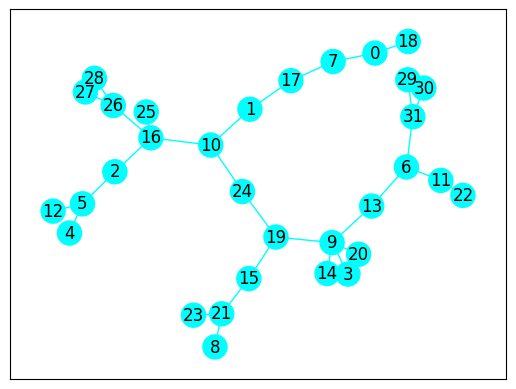

In [15]:
pos = data_analyzer.draw_graph(og_inst)

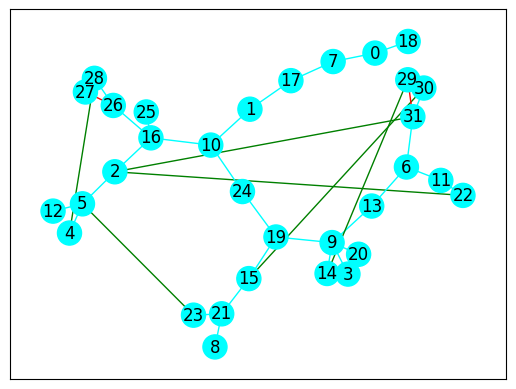

In [16]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)